---
title: 'STATS 202 Homework 3'
---

In [148]:
from ISLP import load_data
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from IPython.display import Markdown
from sklearn.svm import SVR, SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
from scipy.stats import f_oneway
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme()

# Problem 1
## Problem 1.a
**iv.**: Train RSS will steadly decrease, as the model becomes more flexable and will be able to fit the data better.
## Problem 1.b
**ii.**: Test RSS will decrease as the flexability lets it get closer to the real function $Y_0$, then eventually start overfitting on the training data and therfore having an increased test RSS.
## Problem 1.c
**iii.**: Variance will steadly increase as the model becomes more flexable and varies to the data better
## Problem 1.d
**iv.**: squared bias will steadly decrease as the model fits the data better
## Problem 1.e
**v.**: Irreducible error will remain constant as it is independent of the model.
# Problem 2
## Problem 2.a
**iii.**: Train RSS will steadly increase as the model gets more punished for flexability.
## Problem 2.b
**ii.**: Test RSS decrease as the increased penalty term prevents overfitting, while it eventually restricts the model from representing $Y_0$, therfore increasing test RSS.
## Problem 2.c
**iv.**: Variance will steadly decrease as the model is penalized for varying to fit the data
## Problem 2.d
**iii.**: Squared bias will steadly increase as the penalty term causes the model to be less specific and therfore more biased.s
## Problem 2.e
**v.**: Irreducable error is independent of the model so will be constant.
# Problem 3
## Problem 3.a

In [149]:
College = load_data("College")
College["Private"] = College["Private"] == "Yes"
X_train, X_test, y_train, y_test = train_test_split(
    College.drop("Apps", axis=1), College["Apps"], random_state=42
)
scaler = StandardScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Problem 3.b

In [150]:
Markdown(
    "The score is: "
    + str(LinearRegression().fit(X_train, y_train).score(X_test, y_test))
)

The score is: 0.8606501781209516

## Problem 3.c

In [151]:
Markdown(
    "The score is: "
    + str(
        RidgeCV(alphas=np.arange(1, 100))
        .fit(scaled_X_train, y_train)
        .score(scaled_X_test, y_test)
    )
)

The score is: 0.8626496724638395

## Problem 3.d

In [152]:
Markdown(
    "The score is: "
    + str(
        LassoCV(alphas=np.arange(1, 100))
        .fit(scaled_X_train, y_train)
        .score(scaled_X_test, y_test)
    )
)

The score is: 0.8610062021214084

In [153]:
Markdown(
    "the number of nonzero coefficents is: "
    + str(
        np.sum(
            LassoCV(alphas=np.arange(1, 100)).fit(scaled_X_train, y_train).coef_ != 0
        )
    )
)

the number of nonzero coefficents is: 17

## Problem 3.e

In [154]:
grid = GridSearchCV(
    make_pipeline(PCA(), LinearRegression()), {"pca__n_components": np.arange(1, 17)}
).fit(scaled_X_train, y_train)
Markdown("The best M is: " + str(grid.best_params_["pca__n_components"]))

The best M is: 16

In [155]:
Markdown("The score is: " + str(grid.score(scaled_X_test, y_test)))

The score is: 0.8664792682433866

## Problem 3.f

In [156]:
grid = GridSearchCV(PLSRegression(), {"n_components": np.arange(1, 17)}).fit(
    scaled_X_train, y_train
)
Markdown("The best M is: " + str(grid.best_params_["n_components"]))

The best M is: 16

In [157]:
Markdown("The score is: " + str(grid.score(scaled_X_test, y_test)))

The score is: 0.8606488441076391

## Problem 3.g

There is not a significant differnce between the results for these methods; without fruther investigation and much deeper analisys, I don't even think we can conclude that these errors have a statistically significant difference. We see that the most accurate model is PCR ( with a $.87$ score ), while the least accurate is the simple linear regression ( with a $86$ score ).

# Problem 4
## Problem 4.a
$$
\begin{split}
f_1(x)&=\beta_0+\beta_1 x+\beta_2 x^2+\beta_3 x^3+\beta_4(x-\xi)^3_+ \\
&=\beta_0+\beta_1 x+\beta_2 x^2+\beta_3 x^3 \\
a_1&=\beta_0 \\
b_1&=\beta_1 \\
c_1&=\beta_2 \\
d_1&=\beta_3+\beta_4
\end{split}
$$
## Problem 4.b
$$
\begin{split}
f_2(x)&=\beta_0+\beta_1 x+\beta_2 x^2+\beta_3 x^3+\beta_4(x-\xi)^3_+ \\
&=\beta_0-\beta_4 \xi^3+x(\beta_1+3\beta_4 \xi^2)+x^2(\beta_2-3\beta_4 \xi)+x^3(\beta_3+\beta_4) \\
a_2&=\beta_0-\beta_4 \xi^3 \\
b_2&=\beta_1+3\beta_4 \xi^2 \\
c_2&=\beta_2-3\beta_4 \xi \\
d_2&=\beta_3+\beta_4
\end{split}
$$
## Problem 4.c
$$
\begin{split}
f_1(\xi)&=\beta_0+\beta_1 \xi+\beta_2 \xi^2+\beta_3 \xi^3 \\
f_2(\xi)&=\beta_0-\beta_4 \xi^3+\beta_1 \xi+3\beta_4 \xi^3+\beta_2 \xi^2-3\beta_4 \xi^3+\beta_3 \xi^3+\beta_4 \xi^3 \\
&=\beta_0+\beta_1 \xi+\beta_2 \xi^2+\beta_3 \xi^3
\end{split}
$$
## Problem 4.d
$$
\begin{split}
f_1'(\xi)&=\beta_1+2\beta_2 \xi+3\beta_3 \xi^2 \\
f_2'(\xi)&=\beta_1+3\beta_4 \xi^2+2\xi(\beta_2-3\beta_4 \xi)+3\xi^2(\beta_3+\beta_4) \\
&=\beta_1+2\beta_2 \xi+3\beta_3 \xi^2
\end{split}
$$
## Problem 4.e
$$
\begin{split}
f_1''(\xi)&=2\beta_2+6\beta_3 \xi \\
f_2''(\xi)&=2(\beta_2-3\beta_4 \xi)+6\xi(\beta_3+\beta_4) \\
&=2\beta_2+6\beta_3 \xi
\end{split}
$$

# Problem 5 ( Use ANOVA )
First, let's look at a pair plot to see if we observe any non-linear corrilations.

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


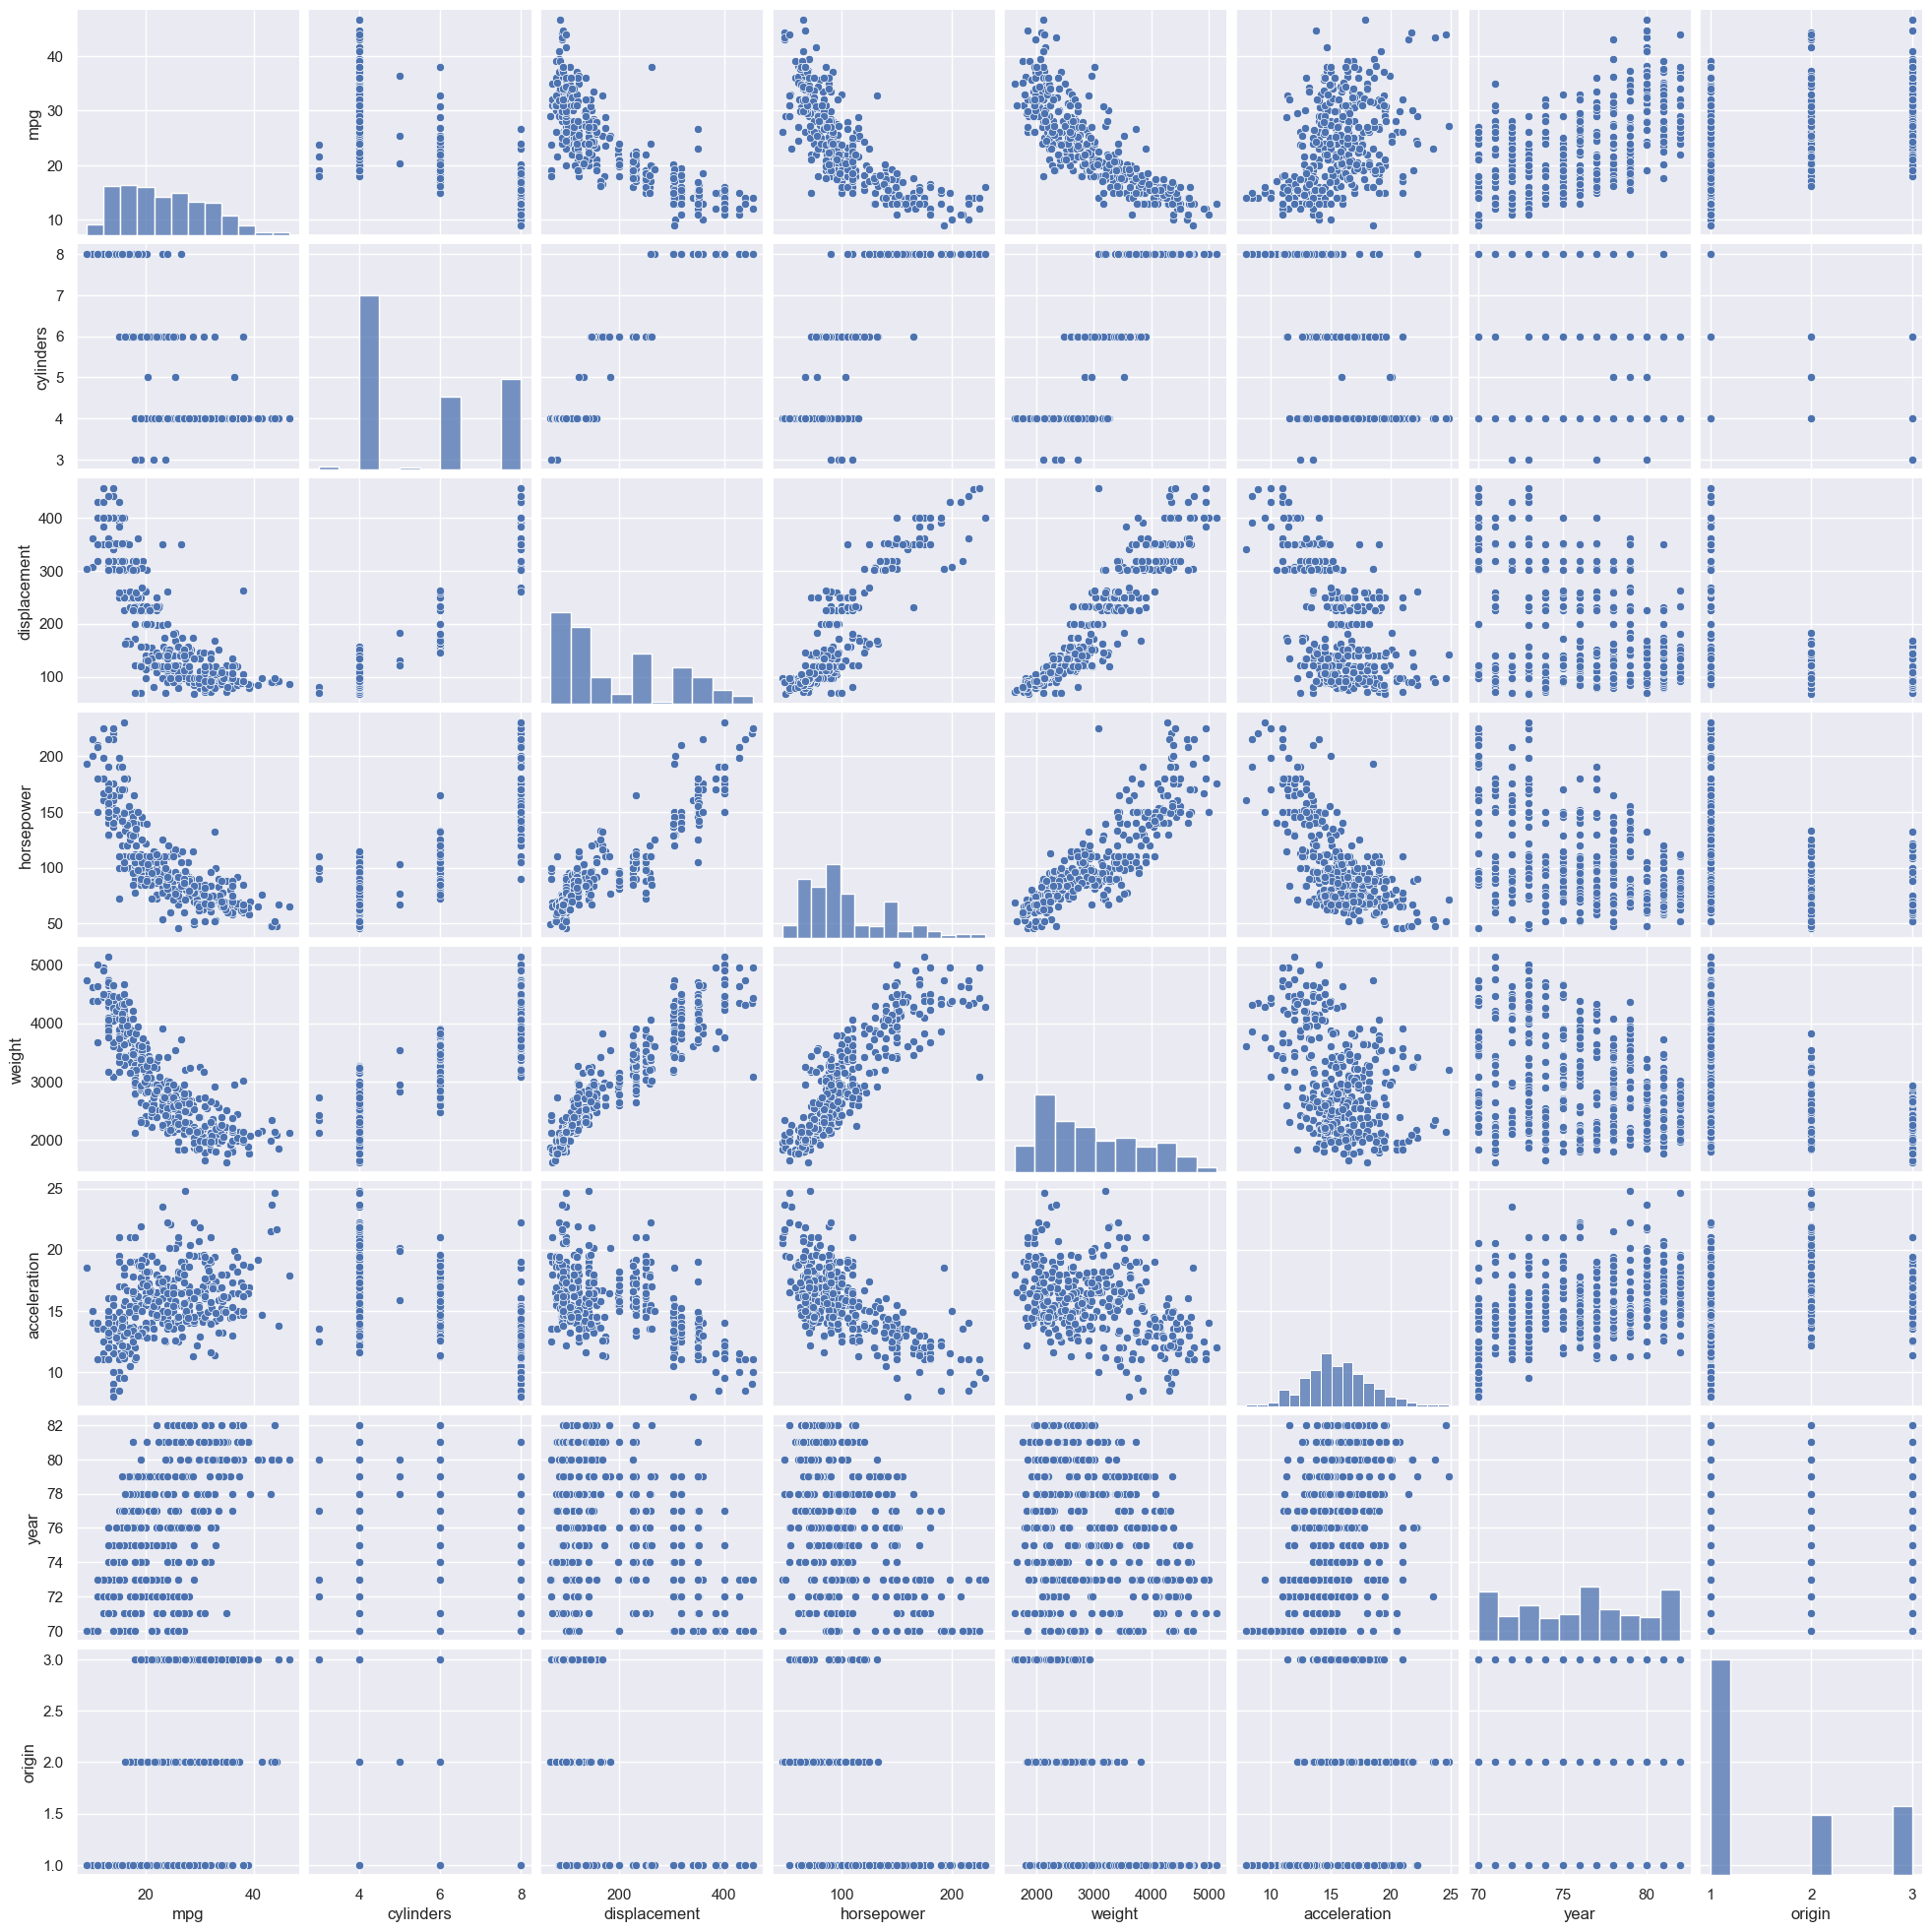

In [158]:
Auto = load_data("Auto")
sns.pairplot(Auto, diag_kws={"fill": "True"})
plt.show()

$\text{mpg}$ versus $\text{displacment}$, $\text{horsepower}$, and $\text{weight}$ look nonlinear. It looks like they could be much better represented by a nolinear model than a linear model. For example, let's compare a linaer and a nonlinear model for $\text{displacment}$ versus $\text{mpg}$.

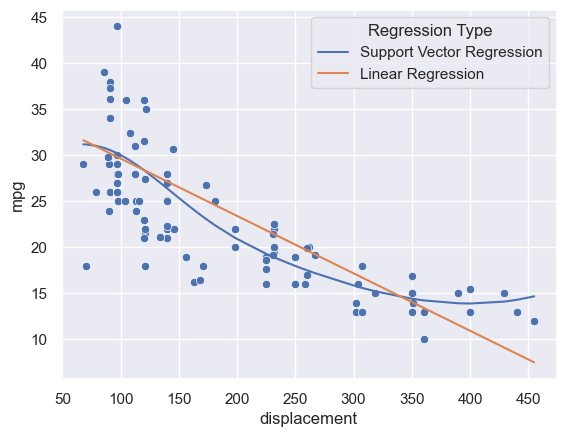

In [159]:
X_train, X_test, y_train, y_test = train_test_split(
    Auto[["displacement"]], Auto["mpg"], random_state=42
)
sns.scatterplot(x=X_test["displacement"], y=y_test)
sns.lineplot(
    data=pd.DataFrame(
        {
            "displacment": X_test["displacement"],
            "Support Vector Regression": make_pipeline(StandardScaler(), SVR())
            .fit(X_train, y_train)
            .predict(X_test),
            "Linear Regression": LinearRegression()
            .fit(X_train, y_train)
            .predict(X_test),
        }
    ).melt(
        "displacment",
        var_name="Regression Type",
        value_name="mpg",
    ),
    x="displacment",
    y="mpg",
    hue="Regression Type",
)
plt.show()

The Support Vector Regression clearly looks like a much better fit to the test data. To confirm that it is better with statistical significance, we can run ANOVA on a larger regression.

In [160]:
X_train, X_test, y_train, y_test = train_test_split(
    Auto[["displacement", "horsepower"]], Auto["mpg"], random_state=42
)
f_oneway(
    make_pipeline(StandardScaler(), SVR()).fit(X_train, y_train).predict(X_test) - y_test,
    LinearRegression().fit(X_train, y_train).predict(X_test) - y_test,
)

F_onewayResult(statistic=0.7966894919110094, pvalue=0.37319081636207585)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(
    Auto.drop(["mpg", "name"], axis=1), Auto["mpg"], random_state=42
)
f_oneway(
    make_pipeline(StandardScaler(), SVR()).fit(X_train, y_train).predict(X_test) - y_test,
    LinearRegression().fit(X_train, y_train).predict(X_test) - y_test,
)

F_onewayResult(statistic=0.0007059737492021477, pvalue=0.978829879918597)

However, we don't find a statistically signficant difference in either case, so we can't reject the nully hypothosis and can not conclude that the data is nonlinear ( or at least that the SVR is a better approximation for the data that the Linear Regression Model ). It may be easier to find statistical signficant with a larger test group or just a larger dataset, but this specific testing setup is far from statistical signficance, even though SVR looks much better.

# Problem 6
## Problem 6.a
$$
\begin{split}
1+3X_1-X_2&=0 \\
X_2&=1+3X_1
\end{split}
$$

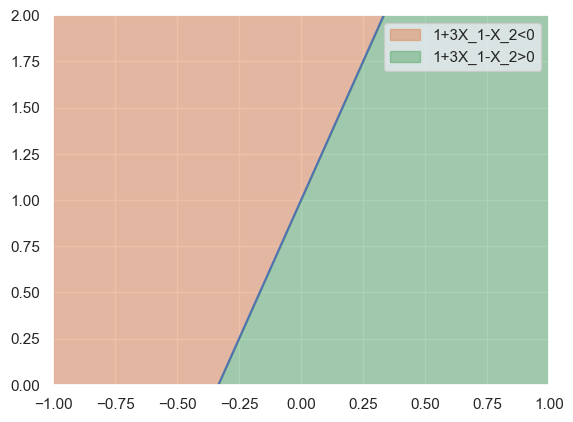

In [162]:
x=np.linspace(-1,1,100)
y=1+3*x

sns.lineplot(x=x, y=y)
plt.fill([x[0],x[0],x[-1]],[y[0],y[-1],y[-1]], color="C1", alpha=0.5,label="1+3X_1-X_2<0")
plt.fill([x[0],x[-1],x[-1]],[y[0],y[0],y[-1]], color="C2", alpha=0.5, label="1+3X_1-X_2>0")

plt.gca().set_xlim(-1,1)
plt.gca().set_ylim(0,2)
plt.legend()
plt.show()

## Problem 6.b
$$
\begin{split}
-2+X_1+2X_2&=0 \\
X_2&=1-\frac{X_1}{2}
\end{split}
$$

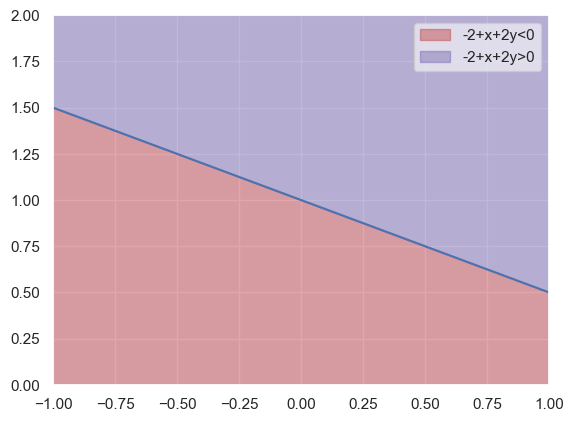

In [163]:
x=np.linspace(-10,10,100)
y=1-x/2
sns.lineplot(x=x, y=y)
plt.fill([x[0],x[0],x[-1]],[y[0],y[-1],y[-1]], color="C3", alpha=0.5,label="-2+x+2y<0")
plt.fill([x[0],x[-1],x[-1]],[y[0],y[0],y[-1]], color="C4", alpha=0.5, label="-2+x+2y>0")

plt.gca().set_xlim(-1,1)
plt.gca().set_ylim(0,2)
plt.legend()
plt.show()

# Problem 8
## Problem 8.a

In [164]:
OJ = load_data("OJ")
OJ["Store7"] = OJ["Store7"] == "Yes"
X_train, X_test, y_train, y_test = train_test_split(OJ.drop("Purchase", axis=1),OJ["Purchase"], train_size=80/107, random_state=42)

## Problem 8.b

In [165]:
svc = SVC(kernel="linear",C=0.01).fit(X_train,y_train)
Markdown("There are " + str(svc.n_support_[0]) + " support points")

There are 309 support points

## Problem 8.c

In [166]:
Markdown("The train score is " + str(svc.score(X_train,y_train)) + " and the test core is " + str(svc.score(X_test,y_test)))

The train score is 0.76 and the test core is 0.7222222222222222

## Problem 8.d

In [167]:
grid = GridSearchCV(
    make_pipeline(StandardScaler(), SVC(kernel="linear")), {"svc__C": np.linspace(0.01, 10,100)}
).fit(X_train,y_train)

## Problem 8.e

In [168]:
Markdown("The train score is " + str(grid.score(X_train,y_train)) + " and the test core is " + str(grid.score(X_test,y_test)))

The train score is 0.85 and the test core is 0.7962962962962963

## Problem 8.f

In [169]:
svc = SVC(kernel="rbf",C=0.01).fit(X_train,y_train)
Markdown("There are " + str(svc.n_support_[0]) + " support points")

There are 306 support points

In [170]:
Markdown("The train score is " + str(svc.score(X_train,y_train)) + " and the test core is " + str(svc.score(X_test,y_test)))

The train score is 0.6175 and the test core is 0.5888888888888889

In [171]:
grid = GridSearchCV(
    make_pipeline(StandardScaler(), SVC(kernel="rbf")), {"svc__C": np.linspace(0.01, 10,100)}
).fit(X_train,y_train)
Markdown("The train score is " + str(grid.score(X_train,y_train)) + " and the test core is " + str(grid.score(X_test,y_test)))

The train score is 0.85125 and the test core is 0.8074074074074075

## Problem 8.g

In [173]:
svc = SVC(kernel="poly",C=0.01,degree=2).fit(X_train,y_train)
Markdown("There are " + str(svc.n_support_[0]) + " support points")

There are 306 support points

In [174]:
Markdown("The train score is " + str(svc.score(X_train,y_train)) + " and the test core is " + str(svc.score(X_test,y_test)))

The train score is 0.6175 and the test core is 0.5888888888888889

In [175]:
grid = GridSearchCV(
    make_pipeline(StandardScaler(), SVC(kernel="poly", degree=2)), {"svc__C": np.linspace(0.01, 10,100)}
).fit(X_train,y_train)
Markdown("The train score is " + str(grid.score(X_train,y_train)) + " and the test core is " + str(grid.score(X_test,y_test)))

The train score is 0.80375 and the test core is 0.7518518518518519

Overall, the radial kernal has the best scor  on the test data when tuned, however it a more complicated model with more vairance ( becuase it is running off of fewer support points ) than the linear model, with a very similar score ( so similar I doubt we would be able to say that it is better with any statistical signficance ). Therefore, the radial or linear models give great results, and their use should be determined by testing and preference.